# Notebook to make Figure 13

In [1]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D
import matplotlib.colors as colors

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_extrinsic_angles/'

### Setup

Load data

In [2]:
# Load waveforms
waveforms_dict = h5ify.load(data_dir+'waveforms_more_angles.h5')

Set up plotting aesthetics

In [3]:
# Amplitude envelope and associated times for GW190521's maxL
amp_times_M = waveforms_dict['maxL']['amp_times_M']
maxL_amp = waveforms_dict['maxL']['amp']

# Colormap to use for plotting
blues = plt.get_cmap("Blues")

### Make Figure

First row

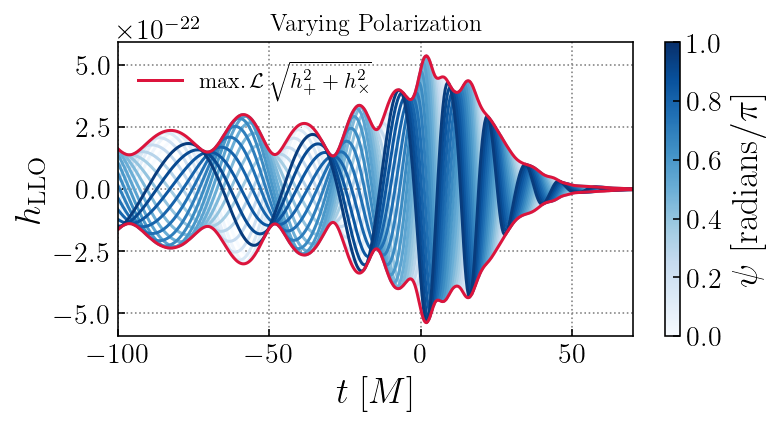

In [4]:
fig, ax = plt.subplots(1,1,figsize=(pf.DEFAULT_FIG_WIDTH/2,2.7))

x_max = 1

for x in np.linspace(0, x_max, 20, endpoint=False):
    
    plt.plot(waveforms_dict['varying polarization'][str(x)]['times_M'], 
             waveforms_dict['varying polarization'][str(x)]['strain'],
             color=blues(x/x_max)) 

plt.plot(amp_times_M, maxL_amp, color='crimson', label = r'$\mathrm{max.}\,\mathcal{L}\,\sqrt{h_+^2 + h_{\times}^2}$')
plt.plot(amp_times_M, -1.0*maxL_amp, color='crimson')

plt.legend(loc='upper left',fontsize=11)
plt.ylabel(r'$h_{\rm LLO}$')
plt.xlabel(r'$t~[M]$')

cnorm = colors.Normalize(vmin=0, vmax=x_max)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=blues), ax=ax, label=r'$\psi~[\mathrm{radians}/\pi] $')

plt.title('Varying Polarization')
plt.xlim(-100,70)
plt.savefig('figure_13a.png', dpi=300, bbox_inches='tight')
plt.show()

Second row

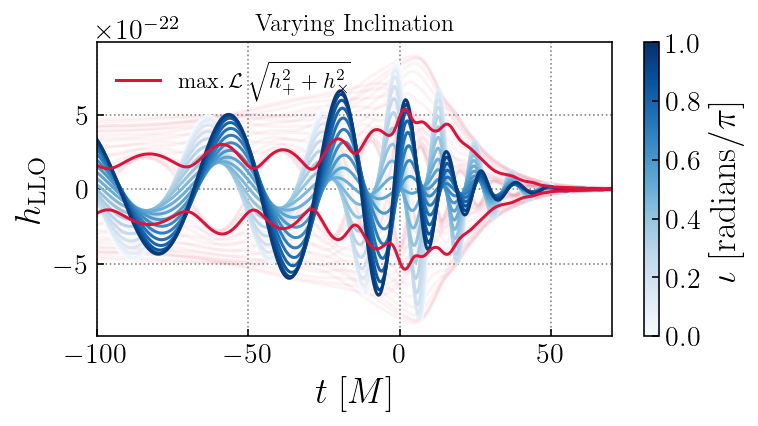

In [5]:
fig, ax = plt.subplots(1,1,figsize=(pf.DEFAULT_FIG_WIDTH/2,2.7))

x_max = 1

for x in np.linspace(0, x_max, 20, endpoint=False):
    
    plt.plot(waveforms_dict['varying inclination'][str(x)]['times_M'], 
             waveforms_dict['varying inclination'][str(x)]['strain'],
             color=blues(x/x_max)) 
    
    amp_kws = dict(color='crimson', alpha=0.05, zorder=0)
    plt.plot(waveforms_dict['varying inclination'][str(x)]['amp_times_M'], 
             waveforms_dict['varying inclination'][str(x)]['amp'], **amp_kws)
    
    plt.plot(waveforms_dict['varying inclination'][str(x)]['amp_times_M'], 
             -1.0*waveforms_dict['varying inclination'][str(x)]['amp'], **amp_kws)
    
plt.plot(amp_times_M, maxL_amp, color='crimson', label = r'$\mathrm{max.}\,\mathcal{L}\,\sqrt{h_+^2 + h_{\times}^2}$')
plt.plot(amp_times_M, -1.0*maxL_amp, color='crimson')

plt.legend(loc='upper left',fontsize=11)
plt.ylabel(r'$h_{\rm LLO}$')
plt.xlabel(r'$t~[M]$')

cnorm = colors.Normalize(vmin=0, vmax=x_max)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=blues), ax=ax, label=r'$\iota~[\mathrm{radians}/\pi] $')

plt.title('Varying Inclination')
plt.xlim(-100,70)
plt.savefig('figure_13b.png', dpi=300, bbox_inches='tight')
plt.show()

Third row

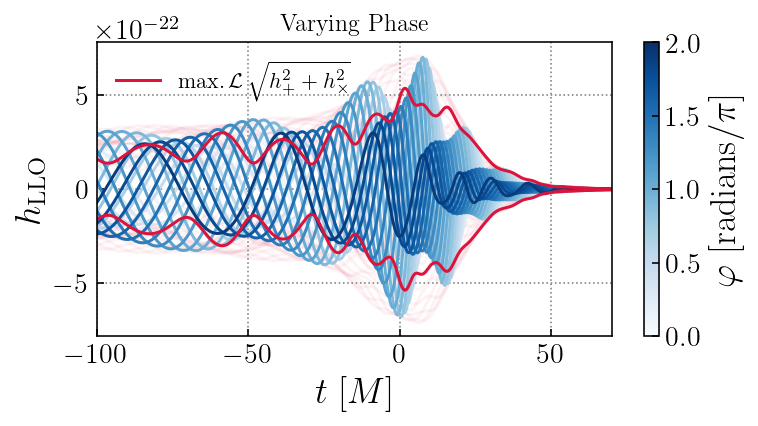

In [6]:
fig, ax = plt.subplots(1,1,figsize=(pf.DEFAULT_FIG_WIDTH/2,2.7))

x_max = 2

for x in np.linspace(0, x_max, 20, endpoint=False):
    
    plt.plot(waveforms_dict['varying phase'][str(x)]['times_M'], 
             waveforms_dict['varying phase'][str(x)]['strain'],
             color=blues(x/x_max)) 
    
    amp_kws = dict(color='crimson', alpha=0.05, zorder=0)
    plt.plot(waveforms_dict['varying phase'][str(x)]['amp_times_M'], 
             waveforms_dict['varying phase'][str(x)]['amp'], **amp_kws)
    
    plt.plot(waveforms_dict['varying phase'][str(x)]['amp_times_M'], 
             -1.0*waveforms_dict['varying phase'][str(x)]['amp'], **amp_kws)
    
plt.plot(amp_times_M, maxL_amp, color='crimson', label = r'$\mathrm{max.}\,\mathcal{L}\,\sqrt{h_+^2 + h_{\times}^2}$')
plt.plot(amp_times_M, -1.0*maxL_amp, color='crimson')

plt.legend(loc='upper left',fontsize=11)
plt.ylabel(r'$h_{\rm LLO}$')
plt.xlabel(r'$t~[M]$')

cnorm = colors.Normalize(vmin=0, vmax=x_max)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=blues), ax=ax, label=r'$\varphi~[\mathrm{radians}/\pi] $')

plt.title('Varying Phase')
plt.xlim(-100,70)
plt.savefig('figure_13c.png', dpi=300, bbox_inches='tight')
plt.show()

Fourth row

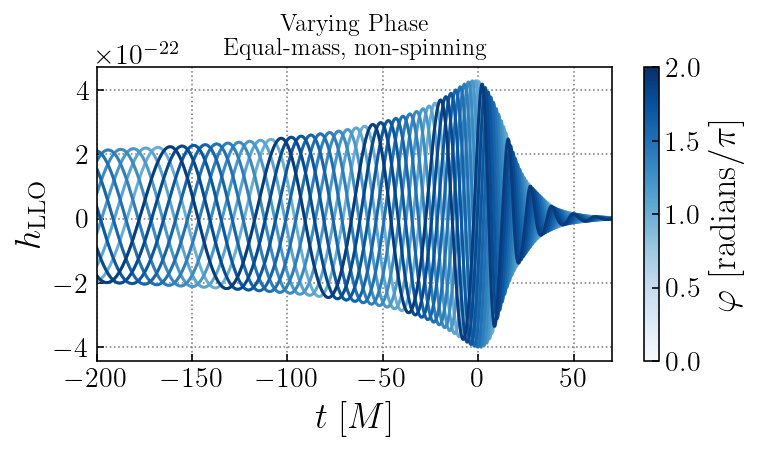

In [7]:
fig, ax = plt.subplots(1,1,figsize=(pf.DEFAULT_FIG_WIDTH/2,2.7))

x_max = 2

for x in np.linspace(0, x_max, 20, endpoint=False):
    
    plt.plot(waveforms_dict['varying phase, equal mass'][str(x)]['times_M'], 
             waveforms_dict['varying phase, equal mass'][str(x)]['strain'],
             color=blues(x/x_max)) 

plt.ylabel(r'$h_{\rm LLO}$')
plt.xlabel(r'$t~[M]$')

cnorm = colors.Normalize(vmin=0, vmax=x_max)
plt.colorbar(matplotlib.cm.ScalarMappable(norm=cnorm, cmap=blues), ax=ax, label=r'$\varphi~[\mathrm{radians}/\pi] $')

plt.title('Varying Phase\nEqual-mass, non-spinning')
plt.xlim(-200,70)
plt.savefig('figure_13d.png', dpi=300, bbox_inches='tight')
plt.show()